# **Online Retail A/B Test (Revenue Comparison)**

#### Step 1: We install the necessary libs.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

print("Libs uploaded!")
#If libs are not installed, run the following commands:
#!pip install pandas numpy matplotlib seaborn scipy


Libs uploaded!


### Step 2:Loading dataset

In [6]:
data = pd.read_csv("data.csv", encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Step 3:DataSet Analyse

In [7]:
print("Data size:", data.shape)
print("Missing values in each column:")
print(data.isnull().sum())

# İlk birkaç satır
data.sample(5)


Data size: (541909, 8)
Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
404007,571665,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,10/18/2011 12:59,0.55,12540.0,Spain
62188,541497,21709,FOLDING UMBRELLA CHOCOLATE POLKADOT,3,1/18/2011 15:19,3.29,NaN,United Kingdom
488297,577808,22727,ALARM CLOCK BAKELIKE RED,4,11/22/2011 8:28,3.75,13403.0,United Kingdom
246608,558709,23092,LARGE ANTIQUE WHITE PHOTO FRAME,2,7/1/2011 13:02,7.90,17338.0,United Kingdom
135324,547892,22949,36 DOILIES DOLLY GIRL,12,3/28/2011 10:15,1.45,12669.0,France


### Step 4:Data Celaning

In [9]:
data = data.dropna(subset=["CustomerID"])
data = data[data["Quantity"] > 0]
data = data[data["UnitPrice"] > 0]

# Create a new column for total price
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


### Step 5:Income Comparison by Country

In [11]:
A = data[data["Country"] == "United Kingdom"]["TotalPrice"]
B = data[data["Country"] == "Germany"]["TotalPrice"]

print(f"UK sample count: {len(A)}")
print(f"Germany sample count: {len(B)}")


UK sample count: 354321
Germany sample count: 9040


### Step 6: Income Distributions

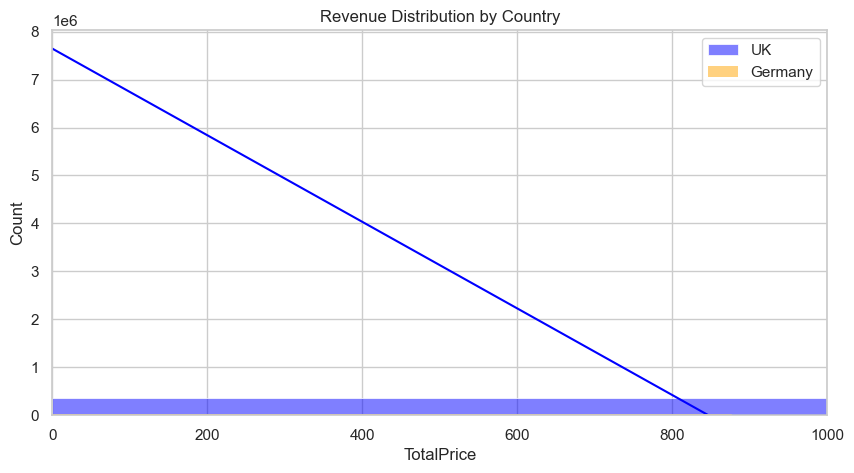

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(A, bins=100, color='blue', label='UK', kde=True)
sns.histplot(B, bins=100, color='orange', label='Germany', kde=True)
plt.xlim(0, 1000)
plt.title("Revenue Distribution by Country")
plt.legend()
plt.show()


### Step 7:t-test

In [14]:
t_stat, p_val = stats.ttest_ind(A, B, equal_var=False)

print(f"T istatistiği: {t_stat:.3f}")
print(f"P-değeri: {p_val:.5f}")

if p_val < 0.05:
    print("Difference is statistically significant.")
else:
    print("Difference is not statistically significant.")


T istatistiği: -7.078
P-değeri: 0.00000
Difference is statistically significant.


### Step 8: Cohen's d

In [19]:
mean_A, mean_B = A.mean(), B.mean()
std_pooled = np.sqrt((A.var() + B.var()) / 2)
cohen_d = (mean_B - mean_A) / std_pooled
lift = (mean_B / mean_A - 1) * 100

print(f"UK avarage income: {mean_A}")
print(f"Germany avarage income: {mean_B}")
print(f"Lift: {lift}%")
print(f"Cohen's d: {cohen_d}")


UK avarage income: 20.626470217683966
Germany avarage income: 25.31716150442478
Lift: 22.741124570694993%
Cohen's d: 0.02022654966109555


### Step 9: Bootstrap Confidence Interval

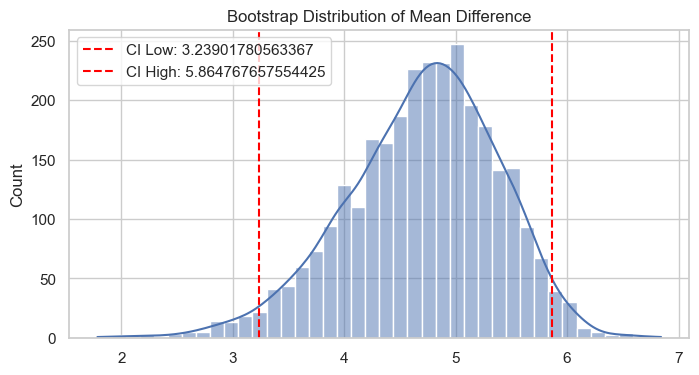

95% Confidence Interval: [3.23901780563367, 5.864767657554425]


In [21]:
boot_diffs = []
for _ in range(3000):
    sample_A = np.random.choice(A, size=len(A), replace=True)
    sample_B = np.random.choice(B, size=len(B), replace=True)
    boot_diffs.append(sample_B.mean() - sample_A.mean())

ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5])

plt.figure(figsize=(8,4))
sns.histplot(boot_diffs, bins=40, kde=True)
plt.axvline(ci_low, color='red', linestyle='--', label=f'CI Low: {ci_low}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'CI High: {ci_high}')
plt.legend()
plt.title("Bootstrap Distribution of Mean Difference")
plt.show()

print(f"95% Confidence Interval: [{ci_low}, {ci_high}]")
